# Scaling relations on different surfaces
The goal of this notebook is to try scaling different molecules to different surfaces using various scaling relations from literature. 

In [2]:
# from rmgpy.data.surface import MetalDatabase
import pickle
import yaml
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load the RMG metal database and binding energies for platinum

In [ ]:
# mdb = MetalDatabase()
# mdb_path = "/home/blais.ch/_02_RMG_envs/RMG_julia_env/RMG-database/input/surface"
# mdb.load(mdb_path)
# pt_bes = mdb.get_binding_energies("Pt111")

In [3]:
oc20_path = "/work/westgroup/opencatalyst/"
data_dict = pickle.load(open(f"{oc20_path}oc20_data_mapping.pkl","rb"))
energy_dict = pickle.load(open(f"{oc20_path}oc20_ref.pkl","rb"))
mat_proj_id = {
    "Pt":'mp-126', # fcc
    "Cu":'mp-30',  # fcc
    "Ni":'mp-23', # fcc
    "Ru":'mp-33', # hcp
    "Rh":'mp-74', # fcc
    "Ir":'mp-101', # fcc
    "Au":'mp-81', # fcc
    "Pd":'mp-2', # fcc
    "Ag":'mp-124', # fcc
    "Co":'mp-102', # hcp
}
metal_sids = {}
for metal, mpid in mat_proj_id.items():
    count = 0
    for key, value_dict in data_dict.items():
        if value_dict['bulk_mpid'] == mpid:
            count +=1
            # print(key, value_dict['ads_symbols'], value_dict['ads_id'], value_dict['miller_index'], )
            # make dictionary of the symbols (e.g. *CH3) miller indices and metal with the "randomXXXXXXX" ID tag
            metal_sids.update({int(key.replace('random','')):(value_dict['ads_symbols'], value_dict['miller_index'], metal)})
    print(f"{count} metal species found for metal {metal}")

172 metal species found for metal Pt
114 metal species found for metal Cu
101 metal species found for metal Ni
287 metal species found for metal Ru
260 metal species found for metal Rh
225 metal species found for metal Ir
159 metal species found for metal Au
197 metal species found for metal Pd
187 metal species found for metal Ag
66 metal species found for metal Co


# 0. extract information we will need to scale

In [4]:
# load the pickles and yamls that we need 
with open('metal_species.pkl', 'rb') as f:
    metal_dict_train = pickle.load(f)
    
with open('metal_species_vt.pkl', 'rb') as f:
    metal_dict_val = pickle.load(f)

with open('metal_species_10_100k.pkl', 'rb') as f:
    metal_dict_10_100k = pickle.load(f)
    
metal_dict = {**metal_dict_train, **metal_dict_val, **metal_dict_10_100k}

# apparently some didn't save properly, so adding in ads symbol, miller index, and metal 
for key, data in metal_dict.items():
    data["ads_symbol"] = metal_sids[key][0]
    data["miller_index"] = metal_sids[key][1]
    data["metal"] = metal_sids[key][2]

### add field for "metal" and "species name" to the xx111_dicts

In [5]:
# generate expressions for metal+facet for easier viewing
unique_species = {}
for value in metal_sids.values():
    # expression for metal and facet, e.g. Pt111
    met_an_facet = value[2] + ''.join(map(str, value[1]))
    
    if value[0] not in unique_species.keys():
        unique_species[value[0]] = [met_an_facet]
    else: 
        unique_species[value[0]].append(met_an_facet)
    

### get "top ten" species (i.e .species with most entries) hopefully this will be enough

In [6]:
sort_unique_species = {k: v for k, v in sorted(unique_species.items(), key=lambda item: len(item[1]), reverse = True)}

In [7]:
# get all instances of a certain species

spec_list = [
    "*COH",
    "*CO",
    "*NO",
    "CH2*CO",
    "*C",
    "*N",
    "*N2",
    "*O,"
    "*CH2",
    "*NH",
    "*ONOH",
    "*OH,"
    "*CCH",
    "*CH2CH2OH",
]

In [8]:
# pare down list with 
count = 0
metal_dict_bes = {}
for idx, value in metal_dict.items():
    if not "y_relaxed" in value.keys():
        print(value["metal"], value["miller_index"], value["ads_symbol"])
        count+=1
    else: 
        metal_dict_bes[idx] = value

print(count, len(metal_dict))

Cu (1, 1, 1) *CO
Pt (1, 0, 0) *CO
Pd (2, 1, 0) *COHCH2
Au (2, 1, 1) *NNCH3
Ni (2, 1, 0) *CH2*CH2
Ni (1, 0, 0) *OCHCH2
Ru (2, 1, 0) *NNCH3
Rh (1, 1, 0) *NH2NH2
Cu (2, 1, 0) *OCHCH2
Ru (2, 1, 0) *CO
Pt (1, 1, 0) *ONNO2
Ni (1, 0, 0) *ONNO2
Ru (1, 0, 0) *CO
Ag (2, 1, 1) *NNCH3
Pd (2, 1, 0) *CO
Ru (1, 1, 0) *NH2NH2
Ag (1, 1, 0) *OCHCH2
Ir (1, 1, 0) *NH2NH2
Ni (1, 0, 0) *OCHCH2
Pd (1, 0, 0) *CO
Pd (1, 1, 1) *CO
Ir (1, 1, 1) *CO
Pd (1, 0, 0) *CH2*CH2
Au (2, 1, 1) *NH2NH2
Pd (2, 2, 1) *ONNO2
Au (1, 0, 0) *NNCH3
Ir (1, 1, 0) *NH2NH2
Rh (1, 1, 0) *NNCH3
Ni (1, 0, 0) *ONNO2
Pd (1, 1, 0) *CO
Rh (2, 1, 0) *CH2*CH2
Pd (2, 1, 0) *OCHCH2
Ni (1, 0, 0) *COHCH2
Ru (2, 0, 1) *COHCH2
Ir (2, 1, 0) *NNCH3
Ir (1, 1, 1) *COHCH2
Pt (2, 2, 1) *CO
Pd (2, 2, 1) *CH2*CH2
Pt (1, 1, 1) *CO
Au (2, 1, 1) *CH2*CH2
Rh (2, 1, 0) *CH2*CH2
Ru (1, 1, 0) *NNCH3
Pd (2, 2, 1) *NH2NH2
Pd (2, 2, 1) *NNCH3
Ni (1, 0, 0) *COHCH2
Ru (2, 1, 2) *OCHCH2
Au (2, 2, 1) *NH2NH2
Ru (2, 1, 0) *CO
Ir (2, 1, 0) *COHCH2
Pd (1, 0, 0) *CO
Ir (1, 1

In [9]:
from ase import Atoms
from ase.calculators.emt import EMT

atom = Atoms('O')
atom.calc = EMT()
e_atom = atom.get_potential_energy()

print('oxygen atom energy: %5.2f eV' % e_atom)


oxygen atom energy:  4.60 eV


In [28]:
bind_en_a

{'Rh': 0.6538820899999678, 'Cu': 0.9732009100000028, 'Pd': 1.2600271199999895}

In [27]:
label

['Rh', 'Cu', 'Pd']

In [25]:
x

[0.6538820899999678, 0.9732009100000028, 1.2600271199999895]

In [24]:
y

[0.4479157200000259, 0.2670409400000153, 0.9959524199999805]

LinregressResult(slope=0.8764756477386435, intercept=-0.8414028979088184, rvalue=0.7001959861172442, pvalue=0.5061918876680812, stderr=0.8936931969755021, intercept_stderr=3.258445800773025)

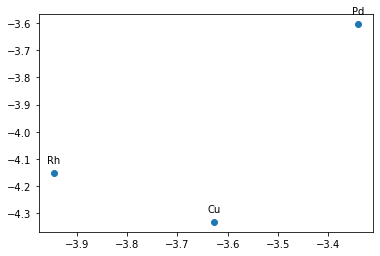

In [31]:
# def plot_bes(metal_dict, facet, ads_symbol):

facet = (1,1,1)
ads_symbol = "*O"
bind_en_a = {}
for idx, value in metal_dict_bes.items():
    if value["miller_index"] == facet and value["ads_symbol"] == ads_symbol:
        # print(idx, value["ads_symbol"], value["metal"], value["miller_index"], value["y_relaxed"], value["y_init"])
        bind_en_a[value["metal"]]= value["y_relaxed"] - e_atom

ads_symbol = "*OH"
bind_en_ah = {}
for idx, value in metal_dict_bes.items():
    if value["miller_index"] == facet and value["ads_symbol"] == ads_symbol and "y_relaxed" in value.keys():
        # print(idx, value["ads_symbol"], value["metal"], value["miller_index"], value["y_relaxed"], value["y_init"])
        bind_en_ah[value["metal"]]= value["y_relaxed"] - e_atom

x = []
y = []
label = []
for metal in bind_en_a.keys():
    if metal in bind_en_a.keys() and metal in bind_en_ah.keys():
        x.append(bind_en_a[metal])
        y.append(bind_en_ah[metal])
        label.append(metal)

plt.scatter(x,y)

# label points with the corresponding metal
for num, _ in enumerate(x):

    point_label = label[num]

    plt.annotate(point_label, # this is the text
                 (x[num],y[num]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
from scipy.stats import linregress
linregress(x, y)

In [63]:
metal_dict[1846594]["pos_relaxed"]

tensor([[-5.2835e-08,  1.5012e+00,  1.3799e+01],
        [-1.3000e+00,  2.2517e+00,  1.8045e+01],
        [ 1.3000e+00,  7.5058e-01,  1.5922e+01],
        [-5.2835e-08,  1.5012e+00,  2.0168e+01],
        [-1.2994e+00,  2.2678e+00,  2.4383e+01],
        [ 1.3000e+00,  7.5058e-01,  2.2291e+01],
        [-1.3000e+00,  3.7529e+00,  1.3799e+01],
        [-2.6001e+00,  4.5035e+00,  1.8045e+01],
        [ 5.0335e-08,  3.0023e+00,  1.5922e+01],
        [-1.3000e+00,  3.7529e+00,  2.0168e+01],
        [ 7.8003e+00,  4.5035e+00,  2.4403e+01],
        [ 5.0335e-08,  3.0023e+00,  2.2291e+01],
        [-2.6001e+00,  6.0047e+00,  1.3799e+01],
        [-3.9001e+00,  6.7552e+00,  1.8045e+01],
        [-1.3000e+00,  5.2541e+00,  1.5922e+01],
        [-2.6001e+00,  6.0047e+00,  2.0168e+01],
        [-3.8859e+00,  6.7478e+00,  2.4383e+01],
        [-1.3000e+00,  5.2541e+00,  2.2291e+01],
        [-3.9001e+00,  8.2564e+00,  1.3799e+01],
        [ 0.0000e+00,  0.0000e+00,  1.8045e+01],
        [-2.6001e+00

# 2. coordination number scaling
scale on top CO2 to another facet using coordination number scaling (

# metal atom binding energy scaling
scale on top CO2 to another facet usinng metal atom binnding energy scaling